# 电位差计及其应用
---
## 基础数据

In [ ]:
import PhyExp as pe
import numpy as np

## 填入数据 begin
# 室温
t = 2_._
# 标准电池20℃时的电动势
E20 = 1.018_ _
## 填入数据 end

# 标准电池修正电动势
En = E20 - 3.99e-5*(t - 20) - 0.94e-6*(t - 20)**2 + 9e-9*(t - 20)**3
# R1初始阻值（保留一位小数）
R1_initial = (int)(En*10000)/10.0
# R2初始阻值（保留一位小数）
R2_initial = 3000 - R1_initial

# 输出结果
print(f"标准电池在{t}℃时的修正电动势En = {En:.5f} V")
print(f"自组电位差计初始阻值设定R1 = {R1_initial:.1f} Ω, R2 = {R2_initial:.1f} Ω")

## Step1 自组电位差计测电动势
### 初步数据填写和计算

In [ ]:
## 填入数据 begin
# 标准电池补偿时两电阻的阻值及总和
R1n = R1_initial
R2n = _
R_sum = R1n + R2n
# 待测电池补偿时两电阻的阻值
R1x = _
R2x = _
## 填入数据 end

# 结果输出
print(f"标准电池补偿时R1 = {R1n:.1f} Ω, R2 = {R2n:.1f} Ω, R1 + R2 = {R_sum:.1f} Ω")
print(f"待测电池补偿时R1 = {R1x:.1f} Ω, R2 = {R2x:.1f} Ω")
if R1x + R2x != R_sum:
    print("WARNING: 数据问题，待测电池补偿时两电阻之和不等于标准电池补偿时两电阻之和！")
else:
    print(f"待测电池的电动势Ex = R1x * 1mA = {R1x/1000:.4f} V")

### 自组电位差计灵敏度测量与误差的粗略估计

In [ ]:
## 填入数据 begin
# 检流计偏转格数
delta_N = 1_
# 此时电阻箱阻值
R1s = _
R2s = _
## 填入数据 end

# 计算灵敏度
S = delta_N/(np.abs(R1s-R1x)/1000)
# 粗略计算自组电位差计电动势测量误差限
Delta_Ex = 0.2/S
# 粗略计算自组电位差计电动势测量B类不确定度
Self_B_uncertainty_Ex = Delta_Ex/np.sqrt(3)

# 结果输出
print(f"自组电位差计灵敏度 S = {S:.1f} div/V")
print(f"自组电位差计电动势测量误差限 ΔEx = {Delta_Ex:.6f} V")
print(f"自组电位差计电动势测量B类不确定度 uB(Ex) = {Self_B_uncertainty_Ex:.6f} V")

### 自组电位差计不确定度严谨计算
不确定度计算公式：
$$
u(E_x) = \frac{E_x}{R_{1n}+R_{2n}} \sqrt{\left[\frac{R_{2n}}{R_{1n}} \frac{\Delta R_{1n}}{\sqrt{3}}\right]^2+\left[\frac{\Delta R_{2n}}{\sqrt{3}}\right]^2+\left[\frac{R_{2x}}{R_{1x}} \frac{\Delta R_{1x}}{\sqrt{3}}\right]^2+\left[\frac{\Delta R_{2x}}{\sqrt{3}}\right]^2}
$$

In [ ]:
## 填入数据 begin
# 电阻箱各电阻度盘的准确度等级 从1000Ω档到0.1Ω档
alpha = np.array([0.1, 0.1, 0.2, 0.5, 5.0])
## 填入数据 end

# 此电阻箱测量各电阻的容差
delta_R1n = pe.Tolerance_Of_Resistance_Box(R1n, 0.1, alpha)
delta_R2n = pe.Tolerance_Of_Resistance_Box(R2n, 0.1, alpha)
delta_R1x = pe.Tolerance_Of_Resistance_Box(R1x, 0.1, alpha)
delta_R2x = pe.Tolerance_Of_Resistance_Box(R2x, 0.1, alpha)

# 待测电池电动势
Ex = R1x / 1000.0

# 自组电位差计测量待测电池电动势的不确定度
Ex_uncertainty = (Ex/(R1n + R2n)) * np.sqrt(
    (R2n/R1n * delta_R1n/np.sqrt(3))**2 +
    (delta_R2n/np.sqrt(3))**2 +
    (R2x/R1x * delta_R1x/np.sqrt(3))**2 +
    (delta_R2x/np.sqrt(3))**2
)

# 结果输出
print(f"各电阻测量的容差：")
print(f"ΔR1n = {delta_R1n:.3f} Ω, ΔR2n = {delta_R2n:.3f} Ω, ΔR1x = {delta_R1x:.3f} Ω, ΔR2x = {delta_R2x:.3f} Ω")
print(f"待测电池电动势 Ex = {Ex:.4f} V")
print(f"自组电位差计测量待测电池电动势的不确定度 u(Ex) = {Ex_uncertainty:.6f} V")

### UJ25测量电动势
UJ25为0.01级表

In [ ]:
## 填入数据 begin
# UJ25度数/V
Ex_UJ25 = _
# UJ25为0.01级表
alpha_UJ25 = 0.01
## 填入数据 end

# UJ25测量待测电池电动势的容差
delta_Ex_UJ25 = Ex_UJ25 * alpha_UJ25 / 100.0
# UJ25测量待测电池电动势的不确定度
UJ25_uncertainty = delta_Ex_UJ25 / np.sqrt(3)
# 与自组电位差计测量结果比较
difference = np.abs(Ex - Ex_UJ25)/Ex_UJ25*100.0

# 结果输出
print(f"UJ25测量待测电池电动势的容差 ΔEx_UJ25 = {delta_Ex_UJ25:.6f} V")
print(f"UJ25测量待测电池电动势的不确定度 u(Ex_UJ25) = {UJ25_uncertainty:.6f} V")
print(f"自组电位差计与UJ25测量结果的差异为 {difference:.3f} %")

### UJ25测量固定电阻阻值（选做）
电路图如下，若测量方法不同**请勿使用此段代码**：

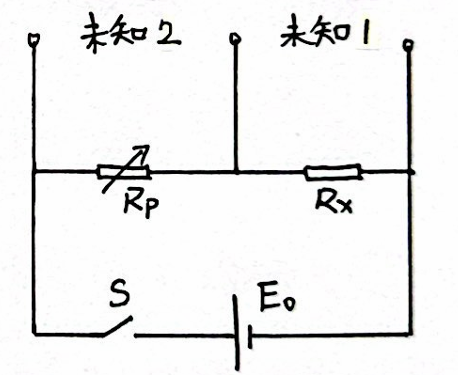

可得公式：$R_x = R_p \frac{U_1}{U_2}$

根据不确定度传递有：
$$
u(R_x) = R_x\sqrt{\left(\frac{u(R_p)}{R_p}\right)^2+\left(\frac{u(U_1)}{U_1}\right)^2+\left(\frac{-u(U_2)}{U_2}\right)^2}
$$
同时：$u(R_p) = \frac{\Delta R_p}{\sqrt{3}}$, $u(U_1) = \frac{U_1\times 0.01\%}{\sqrt{3}}$, $u(U_2) = \frac{U_2\times 0.01\%}{\sqrt{3}}$

In [ ]:
## 填入数据 begin
# 未知1电位差/V
U1_UJ25 = _
# 未知2电位差/V
U2_UJ25 = _
# Rp设置的阻值/Ω
Rp = _
## 填入数据 end

# 计算Rx阻值
Rx = Rp * U1_UJ25 / U2_UJ25
# 计算各项不确定度
delta_Rp = pe.Tolerance_Of_Resistance_Box(Rp, 0.1, alpha)
u_Rp = delta_Rp / np.sqrt(3)
u_U1 = U1_UJ25 * 0.0001 / np.sqrt(3)
u_U2 = U2_UJ25 * 0.0001 / np.sqrt(3)
# 计算Rx不确定度
Rx_uncertainty = Rx * np.sqrt(
    (u_Rp / Rp)**2 +
    (u_U1 / U1_UJ25)**2 +
    (u_U2 / U2_UJ25)**2
)

# 结果输出
print(f"Rp的容差 ΔRp = {delta_Rp:.6f} Ω")
print(f"Rp的不确定度 u(Rp) = {u_Rp:.6f} Ω")
print(f"U1的不确定度 u(U1) = {u_U1:.6f} V")
print(f"U2的不确定度 u(U2) = {u_U2:.6f} V")
print(f"未知电阻 Rx = {Rx:.3f} Ω")
print(f"未知电阻 Rx 的不确定度 u(Rx) = {Rx_uncertainty:.6f} Ω")